### В этом файле мы сравним разные индикаторы SFR

In [2]:
import os
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.io import fits
import astropy.units as u
from astropy.nddata import Cutout2D
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
import scipy.interpolate as inter
from matplotlib import cm
import matplotlib.patches as patches
import math

In [4]:
import functions

importing Jupyter notebook from functions.ipynb
Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [5]:
Distance = 9.3 # Mpc
incl = 62.
cosi = np.cos(incl / 180. * np.pi)
sini = np.sin(incl / 180. * np.pi)

In [6]:

def cut_fits(first_fits=None, second_fits=None, size=None):
    first_data = fits.getdata(first_fits)
    first_data = np.squeeze(first_data)
    first_WCS = WCS(first_fits, naxis = 2)
    cposition1 = SkyCoord('170.06318266 12.99640067'.format(first_WCS.wcs.crval[0], first_WCS.wcs.crval[1]), frame='icrs', unit='deg')
    
    second_data = fits.getdata(second_fits)
    second_data = np.squeeze(second_data)
    second_WCS = WCS(second_fits, naxis = 2)
    cposition2 = SkyCoord('{} {}'.format(second_WCS.wcs.crval[0], second_WCS.wcs.crval[1]), frame='fk5', unit='deg', equinox='J2000.0')
    
    size = u.Quantity(size, u.arcsec)
    
    first_data = Cutout2D(first_data, cposition2, size, wcs=first_WCS, mode='partial', fill_value=0.)
    second_data = Cutout2D(second_data, cposition2, size, wcs=second_WCS, mode='trim')
    
    return first_data, second_data  

In [7]:
def create_new_grid(first_fits=None, second_fits=None, size=None):
    first_data, second_data = cut_fits(first_fits=first_fits, second_fits=second_fits, size=size)
    shape = first_data.shape
    first_data_wcs = first_data.wcs
    X, Y = np.meshgrid(np.arange(0, shape[1], 1), np.arange(0, shape[0], 1))
    sgrid = pixel_to_skycoord(X.ravel(), Y.ravel(), first_data_wcs).reshape((shape[0], shape[1]))
    
    grid_pixs = []
    new_second_data = []
    for scoord in sgrid.ravel():
        spix = skycoord_to_pixel(scoord, second_data.wcs)
        grid_pixs.append(spix)
        new_second_data.append(second_data.data[int(spix[1])][int(spix[0])])
    
    return grid_pixs, new_second_data  

## $I_{24}$

BEGIN MAIN HEADER ---------------------------------                              [astropy.io.fits.card]
BEGIN EXTENSION HEADER ----------------------------                              [astropy.io.fits.card]


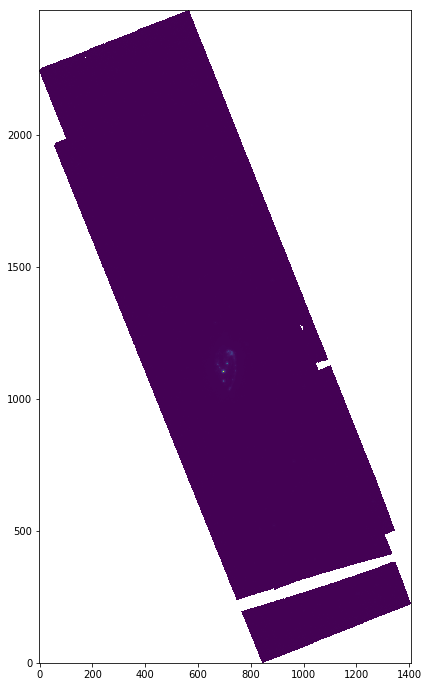

In [8]:
functions.fits_file('./data/NGC_3627_I_MIPS24_kab2003.fits', 7, 12)

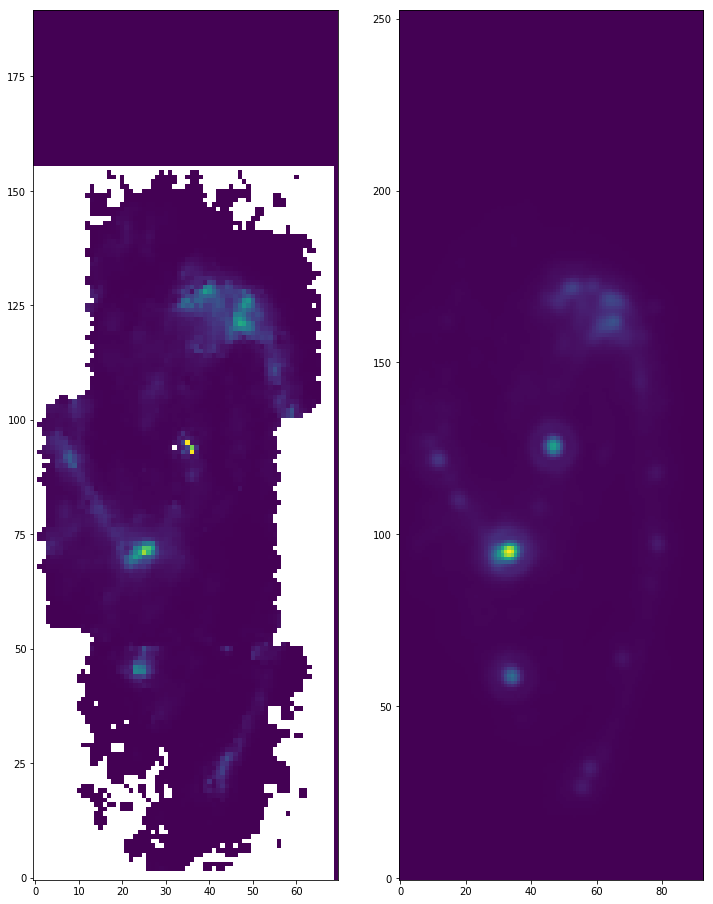

(190, 70)
(253, 93)


In [9]:
size = [380,140] 
first_data, second_data = cut_fits(first_fits='./data/NGC3627_map_ha_corr.fits', second_fits='./data/NGC_3627_I_MIPS24_kab2003.fits', size=size) 

fig, [ax, ax2] = plt.subplots(figsize=[12, 16], ncols=2)
ax.imshow(first_data.data, origin='lower', aspect="auto")
ax2.imshow(second_data.data, origin='lower', aspect="auto")
plt.show()

print(first_data.shape)
print(second_data.shape)  

In [10]:
size = [380,140]
grid_pix, I_24_ = create_new_grid(first_fits = './data/NGC3627_map_ha_corr.fits', second_fits = './data/NGC_3627_I_MIPS24_kab2003.fits', size = size) 


In [11]:
I_24_ = np.array(I_24_).reshape(190,70)
I_24 = I_24_[0:-34,0:-4] 

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


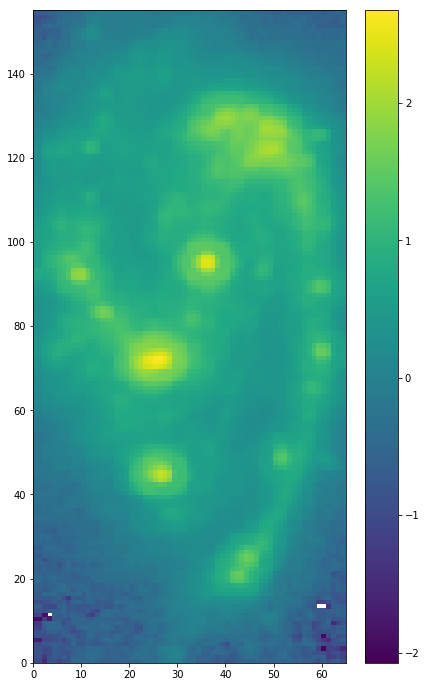

In [12]:
fig = plt.figure(figsize = [7,12])
Z = I_24
X, Y = np.meshgrid(np.arange(0,66,1), np.arange(0,156,1))
picture=plt.pcolormesh(X,Y,np.log10(Z))
#picture.set_clim( vmax=0.)
plt.colorbar()
plt.show()

## $I_{FUV}$

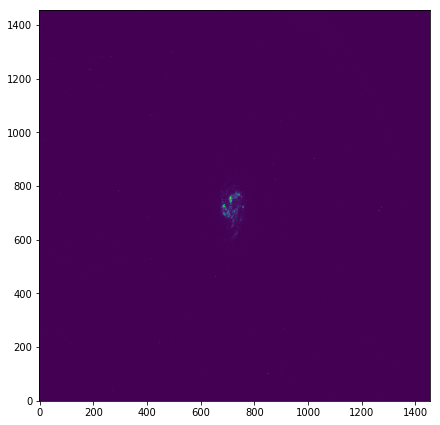

In [21]:
functions.fits_file('./data/NGC_3627_I_FUV_d2009.fits', 7, 12)

In [22]:
def cut_fits(first_fits=None, second_fits=None, size=None):
    first_data = fits.getdata(first_fits)
    first_data = np.squeeze(first_data)
    first_WCS = WCS(first_fits, naxis = 2)
    cposition1 = SkyCoord('170.06318266 12.99640067'.format(first_WCS.wcs.crval[0], first_WCS.wcs.crval[1]), frame='icrs', unit='deg')
    
    second_data = fits.getdata(second_fits)
    second_data = np.squeeze(second_data)
    second_WCS = WCS(second_fits, naxis = 2)
    cposition2 = SkyCoord('170.375  12.91'.format(second_WCS.wcs.crval[0], second_WCS.wcs.crval[1]), frame='fk5', unit='deg', equinox='J2000.0')
    
    size = u.Quantity(size, u.arcsec)
    
    first_data = Cutout2D(first_data, cposition1, size, wcs=first_WCS, mode='partial', fill_value=0.) # mode='trim','strict'
    second_data = Cutout2D(second_data, cposition1, size, wcs=second_WCS, mode='partial', fill_value=0.) # mode='trim','strict'
    
    return first_data, second_data  

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


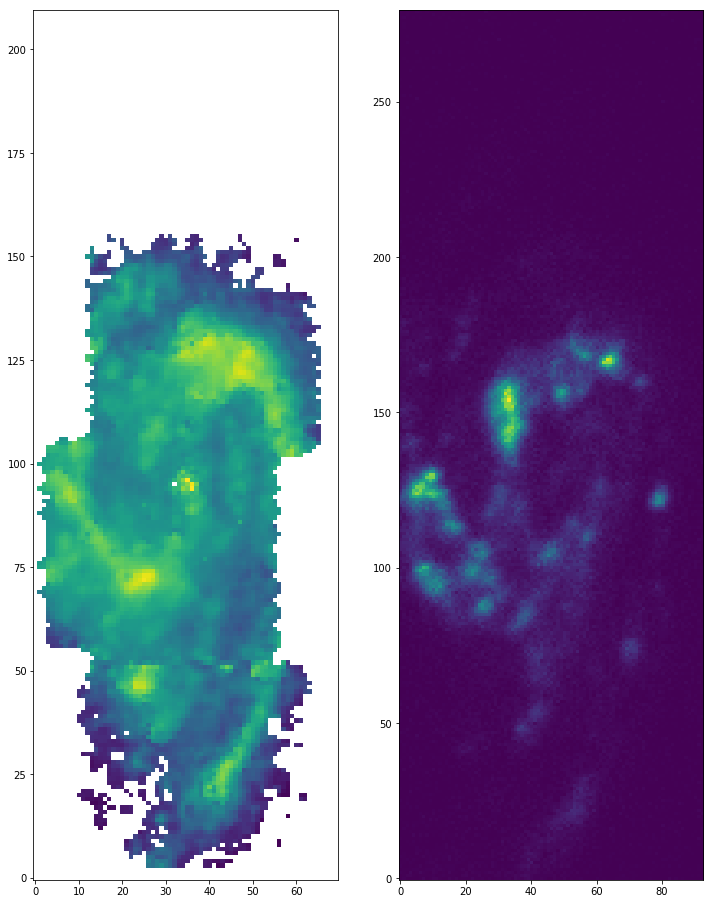

(array(46.13284964), array(123.93838406))
(210, 70)
(280, 93)


In [23]:
size = [420,140] 
first_data, second_data = cut_fits(first_fits='./data/NGC3627_map_ha_corr.fits', second_fits='./data/NGC_3627_I_FUV_d2009.fits', size=size) 

fig, [ax, ax2] = plt.subplots(figsize=[12, 16], ncols=2)
ax.imshow(np.log10(first_data.data), origin='lower', aspect="auto")
ax2.imshow(second_data.data, origin='lower', aspect="auto")
plt.show()

cposition= SkyCoord('170.063  12.99', frame='icrs', unit='deg', equinox='J2000.0')
cpixel = skycoord_to_pixel(cposition,second_data.wcs)

print(cpixel)
print(first_data.shape)
print(second_data.shape)  

In [24]:
def create_new_grid_for_FUV(first_fits=None, second_fits=None, size=None):
    first_data, second_data = cut_fits(first_fits=first_fits, second_fits=second_fits, size=size)
    shape = first_data.shape
    first_data_wcs = first_data.wcs
    X, Y = np.meshgrid(np.arange(0, shape[1], 1), np.arange(0, shape[0], 1))
    sgrid = pixel_to_skycoord(X.ravel(), Y.ravel(), first_data_wcs).reshape((shape[0], shape[1]))
    
    grid_pixs = []
    new_second_data = []
    for scoord in sgrid.ravel():
        spix = skycoord_to_pixel(scoord, second_data.wcs)
       
        if (spix[1]<280):
            grid_pixs.append(spix)
            new_second_data.append(second_data.data[int(spix[1])][int(spix[0])])
    
    return grid_pixs, new_second_data 

In [25]:
size = [420,140]
grid_pix, I_FUV_ = create_new_grid_for_FUV(first_fits = './data/NGC3627_map_ha_corr.fits', second_fits = './data/NGC_3627_I_FUV_d2009.fits', size = size) 
print(len(I_FUV_))

14700


In [26]:
#I_FUV_ = np.concatenate([np.array([0.]),I_FUV_, np.zeros(13)])
I_FUV_ = np.array(I_FUV_).reshape(210,70)


/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


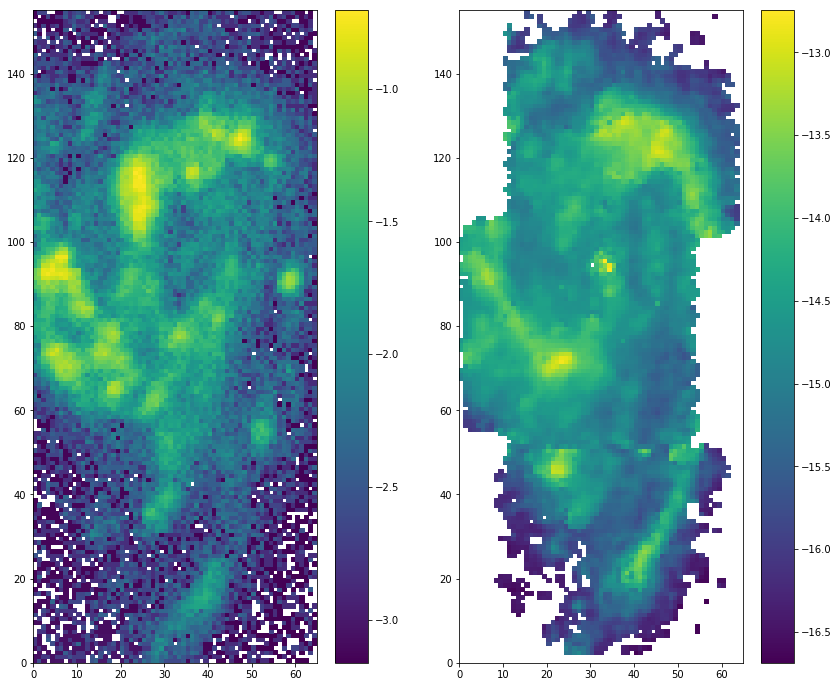

In [27]:
H_alpha = np.load('./data/H_alpha.npy')
I_FUV = I_FUV_[1:-53,1:-3]
X, Y = np.meshgrid(np.arange(0,66,1), np.arange(0,156,1))
fig = plt.figure(figsize = [14,12])
plt.subplot(1,2,1)
Z = I_FUV
picture=plt.pcolormesh(X,Y,np.log10(Z))
plt.colorbar()
X, Y = np.meshgrid(np.arange(0,66,1), np.arange(0,156,1))
plt.subplot(1,2,2)
picture=plt.pcolormesh(X,Y,np.log10(H_alpha))
plt.colorbar()
plt.show()

Ещё нужно учеть FUV за поглощение: $$A(FUV) = 0.556 + 2.292\times(FUV-NUV)$$

## $I_{NUV}$

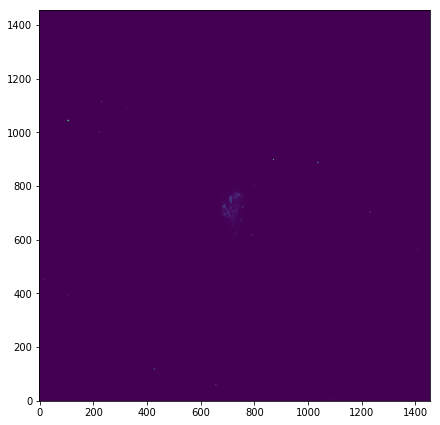

In [28]:
functions.fits_file('./data/NGC_3627_I_NUV_d2009.fits', 7, 12)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


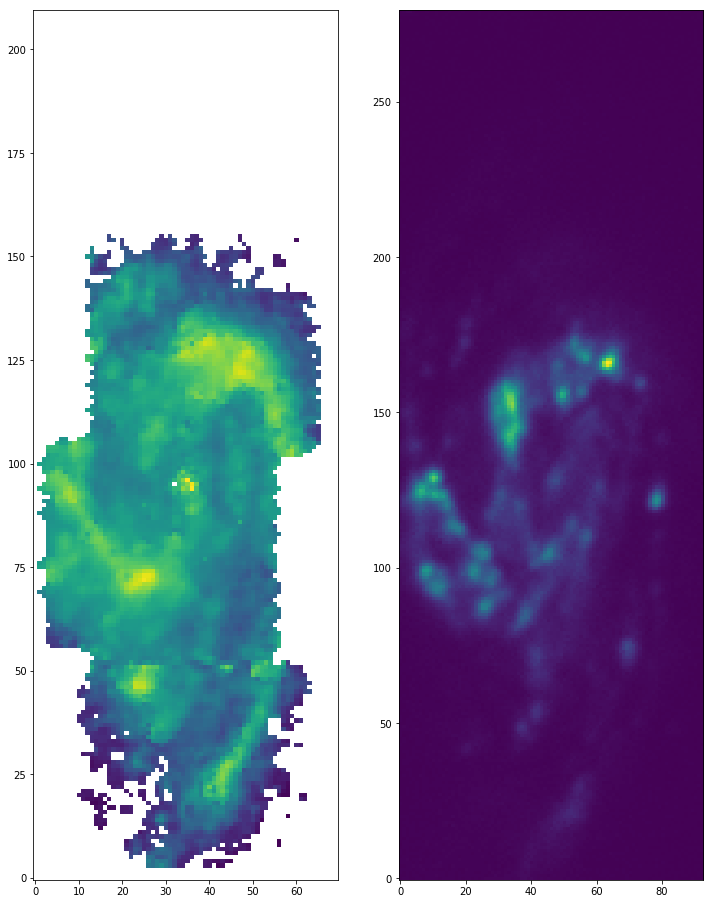

(array(46.13284964), array(123.93838406))
(210, 70)
(280, 93)


In [29]:
size = [420,140] 
first_data, second_data = cut_fits(first_fits='./data/NGC3627_map_ha_corr.fits', second_fits='./data/NGC_3627_I_NUV_d2009.fits', size=size) 

fig, [ax, ax2] = plt.subplots(figsize=[12, 16], ncols=2)
ax.imshow(np.log10(first_data.data), origin='lower', aspect="auto")
ax2.imshow(second_data.data, origin='lower', aspect="auto")
plt.show()

cposition= SkyCoord('170.063  12.99', frame='icrs', unit='deg', equinox='J2000.0')
cpixel = skycoord_to_pixel(cposition,second_data.wcs)

print(cpixel)
print(first_data.shape)
print(second_data.shape)  

In [30]:
size = [420,140]
grid_pix, I_NUV_ = create_new_grid_for_FUV(first_fits = './data/NGC3627_map_ha_corr.fits', second_fits = './data/NGC_3627_I_FUV_d2009.fits', size = size) 
print(len(I_NUV_))

14700


In [31]:
I_NUV_ = np.array(I_NUV_).reshape(210,70)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


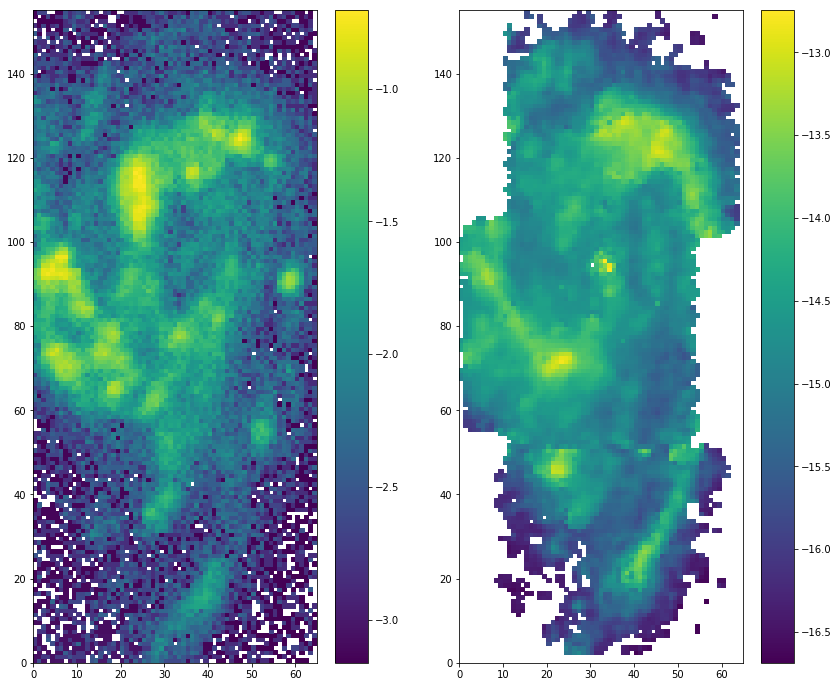

In [32]:
I_NUV = I_NUV_[1:-53,1:-3]
X, Y = np.meshgrid(np.arange(0,66,1), np.arange(0,156,1))
fig = plt.figure(figsize = [14,12])
plt.subplot(1,2,1)
Z = I_NUV
picture=plt.pcolormesh(X,Y,np.log10(Z))
plt.colorbar()
X, Y = np.meshgrid(np.arange(0,66,1), np.arange(0,156,1))
plt.subplot(1,2,2)
picture=plt.pcolormesh(X,Y,np.log10(H_alpha))
plt.colorbar()
plt.show()

In [33]:
A_FUV = 0.556 + 2.292 * (I_FUV - I_NUV)

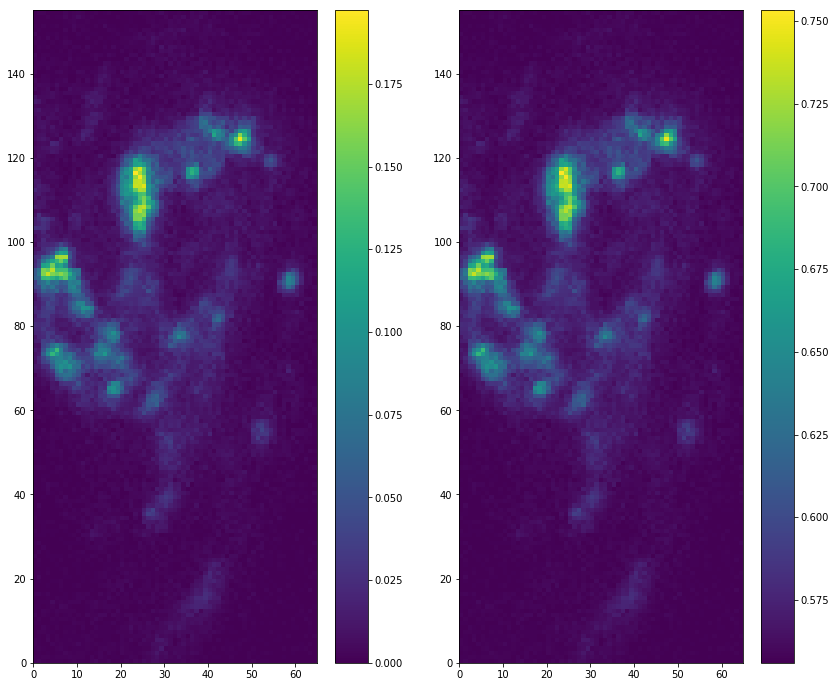

In [41]:
X, Y = np.meshgrid(np.arange(0,66,1), np.arange(0,156,1))
fig = plt.figure(figsize = [14,12])
plt.subplot(1,2,1)
Z = I_FUV
picture=plt.pcolormesh(X,Y,Z)
plt.colorbar()
X, Y = np.meshgrid(np.arange(0,66,1), np.arange(0,156,1))
plt.subplot(1,2,2)
Z = I_FUV + A_FUV
picture=plt.pcolormesh(X,Y,Z)
plt.colorbar()
plt.show()

In [42]:
np.save('./data/I_FUV.npy',I_FUV+A_FUV)
np.save('./data/I_24.npy',I_24)

### Первый вычисляется: $$\Sigma_{SFR} = 8.1\times 10^{-2} I_{FUV} + 3.2^{+1.2}_{-0.7}\times 10^{-3} I_{24}$$

In [14]:
I_FUV = np.load('./data/I_FUV.npy')
I_24 = np.load('./data/I_24.npy')
Sigma_SFR = np.load('./data/Sigma_SFR.npy')

In [15]:
Sigma_SFR_FUV_24 = 8.1 * 10**(-2) * I_FUV + 3.2 * 10**(-3) * I_24

Text(0.5, 1.0, '$\\Sigma_{SFR}(FUV+\\mu24)$')

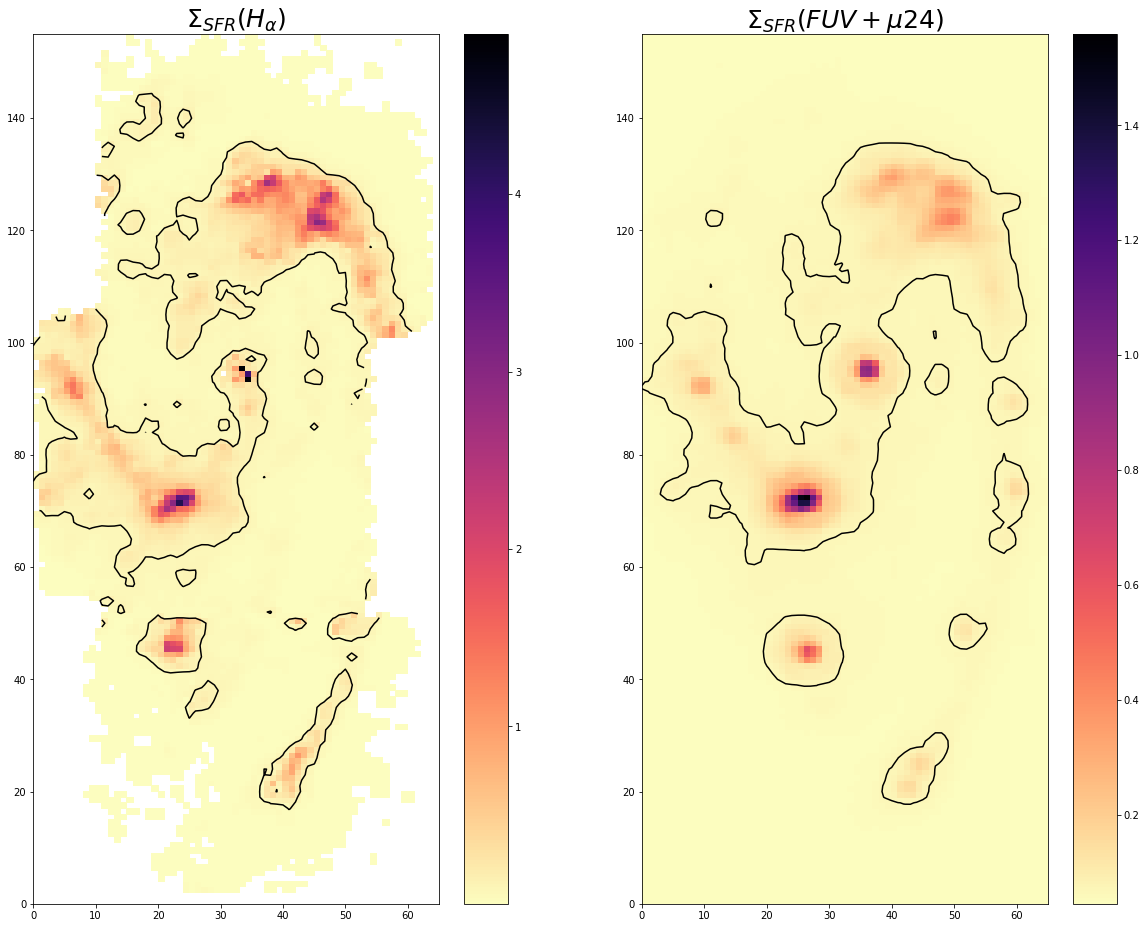

In [19]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[20, 16])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.095,],aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, Sigma_SFR, cmap='magma_r')
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$\Sigma_{SFR}(H_{\alpha})$', fontsize=25)

plt.subplot(1,2,2)

quadmesh = plt.pcolormesh(X, Y, Sigma_SFR_FUV_24, cmap='magma_r')
plt.colorbar()
CS = plt.contour(X, Y, Sigma_SFR_FUV_24, levels=[0.07,],aspect='auto', alpha=1, colors='black')
#quadmesh.set_clim(vmin=0.,vmax = 1.2)
quadmesh.cmap.set_under('white')

plt.title(r'$\Sigma_{SFR}(FUV+\mu24)$', fontsize=25)